In [30]:
import pandas as pd
import networkx as nx
import os
import json
from tqdm.notebook import tqdm
from matplotlib import style
import matplotlib.pyplot as plt

In [27]:
style.use('seaborn-dark')

In [2]:
bussi_file = 'yelp_academic_dataset_business.json'
user_file = 'yelp_academic_dataset_user.json'
review_file = 'yelp_academic_dataset_review.json'

In [3]:
def parse_file(filename):
    with open(filename) as inputfile:
        for line in inputfile:
            yield json.loads(line)

In [4]:
parsed_array = [b for b in parse_file(bussi_file)]

In [5]:
len(parsed_array)

209393

In [6]:
df = pd.DataFrame.from_records(parsed_array)

In [7]:
df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209388,9Q0fPWAjUweoFDk0kafuzQ,Nishi Sushi,9750 Weston Road,Vaughan,ON,L4H 2P2,43.838555,-79.559823,4.0,5,0,"{'Ambience': '{'romantic': False, 'intimate': ...","Japanese, Sushi Bars, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
209389,PotiAhtDMYMNsJCzV0oLAw,Walmart,3240 Wilkinson Blvd,Charlotte,NC,28208,35.226307,-80.893539,2.0,13,0,"{'RestaurantsPriceRange2': '1', 'BusinessParki...","Department Stores, Food, Mobile Phones, Fashio...",None
209390,SYa2j1boLF8DcGVOYfHPcA,Five Guys,7014-590 E Camelback Rd,Scottsdale,AZ,85251,33.504062,-111.929431,3.5,97,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","American (New), Food, Burgers, Restaurants, Fa...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
209391,RSSIsgO00OuWQTRoITacpA,Indian Trail Dog Training,,Indian Trail,NC,28079,35.101965,-80.599385,5.0,3,1,None,"Pet Services, Pet Training, Pets","{'Monday': '0:0-0:0', 'Tuesday': '7:0-19:0', '..."


In [8]:
city_counts = df['city'].value_counts()

In [9]:
city_counts.head(20)

Las Vegas          31631
Toronto            20366
Phoenix            20171
Charlotte          10422
Scottsdale          9342
Calgary             8377
Pittsburgh          7630
Montréal            6979
Mesa                6577
Henderson           5272
Tempe               4797
Chandler            4580
Cleveland           3857
Glendale            3824
Gilbert             3745
Madison             3685
Mississauga         3518
Peoria              2080
Markham             1963
North Las Vegas     1677
Name: city, dtype: int64

In [10]:
categories = {}

In [11]:
for idx, row in tqdm(df.iterrows(), total=len(df)):
    if isinstance(row['categories'], str):
        s = map(lambda x: x.strip(), row['categories'].split(','))
        for c in s:
            if c not in categories:
                categories[c] = 0
            categories[c] += 1 

In [12]:
categories_df = pd.Series(categories)

In [13]:
categories_df.sort_values(ascending=False).head(20)

Restaurants                  63944
Shopping                     34644
Food                         32991
Home Services                22487
Beauty & Spas                20520
Health & Medical             19227
Local Services               15783
Automotive                   14720
Nightlife                    14211
Bars                         12400
Event Planning & Services    11263
Active Life                  10225
Coffee & Tea                  8415
Fashion                       8374
Fast Food                     8106
Sandwiches                    8064
American (Traditional)        7596
Home & Garden                 7331
Hair Salons                   7303
Pizza                         7302
dtype: int64

In [14]:
rest_only_df = df[df.apply(lambda row: isinstance(row['categories'], str) and 'Restaurants' in row['categories'], axis=1)]

In [15]:
rest_only_df['categories']

8         Ethnic Food, Food Trucks, Specialty Food, Impo...
20               Food, Restaurants, Grocery, Middle Eastern
24                   Restaurants, Cheesesteaks, Poutineries
25             Japanese, Fast Food, Food Court, Restaurants
30        Persian/Iranian, Turkish, Middle Eastern, Rest...
                                ...                        
209381       Nightlife, Diners, Bars, Southern, Restaurants
209383    Restaurants, Sandwiches, Food, Breakfast & Bru...
209385    Restaurants, Pizza, Sandwiches, Fast Food, Chi...
209388                    Japanese, Sushi Bars, Restaurants
209390    American (New), Food, Burgers, Restaurants, Fa...
Name: categories, Length: 63944, dtype: object

In [16]:
num_cat = rest_only_df.apply(lambda row: len(row['categories'].split(',')), axis=1)

In [17]:
num_cat.sort_values(ascending=False)

20692     37
30186     33
140752    25
192880    24
23447     23
          ..
99892      1
145624     1
146318     1
119200     1
162821     1
Length: 63944, dtype: int64

In [18]:
rest_only_df.loc[20692]['categories']

'Bakeries, Cafes, DJs, Home Services, Music Venues, Barbeque, Event Planning & Services, Food, Home & Garden, Beauty & Spas, Restaurants, Nail Salons, Fashion, Fitness & Instruction, Fur Clothing, Pilates, Party & Event Planning, Pizza, Shopping, Lighting Fixtures & Equipment, Food Court, Automotive, Active Life, Arts & Entertainment, Furniture Stores, Ice Delivery, Auto Repair, Furniture Repair, Electronics, Italian, Local Services, Party Equipment Rentals, Audio/Visual Equipment Rental, Furniture Rental, Nightlife, Karaoke, Photo Booth Rentals'

In [19]:
toronto_rest = rest_only_df[rest_only_df['city'] == 'Toronto']

In [20]:
toronto_rest

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
38,rVBPQdeayMYht4Uv_FOLHg,Gourmet Burger Company,843 Kipling Avenue,Toronto,ON,M8Z 5G9,43.633291,-79.531768,3.0,13,0,"{'RestaurantsPriceRange2': '2', 'RestaurantsAt...","Restaurants, Burgers, Food",None
73,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,Toronto,ON,M4M 1Y3,43.666376,-79.348773,4.0,116,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': 'u'b...","Vietnamese, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
110,8k62wYhDVq1-652YbJi5eg,Tim Hortons,90 Adelaide Street W,Toronto,ON,M5H 3V9,43.649859,-79.382060,3.0,8,1,"{'OutdoorSeating': 'False', 'RestaurantsDelive...","Bagels, Donuts, Food, Cafes, Coffee & Tea, Res...",None
149,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,3-1265 York Mills Road,Toronto,ON,M3A 1Z3,43.765279,-79.326248,3.0,11,1,"{'NoiseLevel': ''loud'', 'BusinessParking': '{...","Fast Food, Restaurants, Chicken Shop",None
150,NLaK58WvlNQdUunSIkt-jA,Zav Coffee Shop & Gallery,2048 Danforth Avenue,Toronto,ON,M4C 1J6,43.685608,-79.313936,4.5,24,1,"{'DogsAllowed': 'False', 'OutdoorSeating': 'Tr...","Coffee & Tea, Restaurants, Sandwiches, Food","{'Monday': '0:0-0:0', 'Tuesday': '7:30-17:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209300,thzyiQZb16zD8wMliaEfRQ,Sushi Supreme,1995 Yonge Street,Toronto,ON,M4S 1Z8,43.700617,-79.396762,4.0,104,1,"{'Ambience': '{'romantic': False, 'intimate': ...","Sushi Bars, Restaurants, Japanese","{'Monday': '12:0-23:0', 'Tuesday': '12:0-23:0'..."
209315,eUi3O-8Gqh_nJ_ZhO-25gQ,Get & Go Burrito,"1077 Wilson Avenue, Unit 8",Toronto,ON,M3K 1G7,43.726656,-79.480365,3.5,43,1,"{'BusinessParking': '{'garage': False, 'street...","Mexican, Restaurants","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
209328,yFQCdWr_k1pTObzHPGis9Q,Grasshopper Restaurant,310 College Street,Toronto,ON,M5T 1S2,43.657716,-79.402098,4.0,177,1,"{'DogsAllowed': 'False', 'BikeParking': 'True'...","Vegan, Restaurants, Vegetarian, Salad","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
209359,GAgEoHcf4PSuZRS5Zd3ltA,Q's Shawarma,1075 Martin Grove Road,Toronto,ON,M9W 4W6,43.701807,-79.575135,4.0,16,1,"{'GoodForKids': 'True', 'HasTV': 'True', 'Rest...","Restaurants, Mediterranean","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."


(array([6.729e+03, 1.025e+03, 4.000e+02, 1.940e+02, 1.240e+02, 6.300e+01,
        4.700e+01, 2.600e+01, 2.100e+01, 1.400e+01, 4.000e+00, 6.000e+00,
        5.000e+00, 3.000e+00, 3.000e+00, 3.000e+00, 3.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([   3. ,   58.1,  113.2,  168.3,  223.4,  278.5,  333.6,  388.7,
         443.8,  498.9,  554. ,  609.1,  664.2,  719.3,  774.4,  829.5,
         884.6,  939.7,  994.8, 1049.9, 1105. , 1160.1, 1215.2, 1270.3,
        1325.4, 1380.5, 1435.6, 1490.7, 1545.8, 1600.9, 1656. , 1711.1,
        1766.2, 1821.3, 1876.4, 1931.5, 1986.6, 2041.7, 2096.8, 2151.9,
        2207. , 

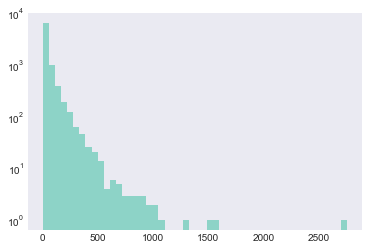

In [31]:
plt.hist(toronto_rest['review_count'], bins=50, log=True)

In [32]:
user_df = pd.DataFrame.from_records([u for u in parse_file(user_file)])

(array([1.948141e+06, 1.479900e+04, 3.430000e+03, 1.168000e+03,
        5.400000e+02, 2.700000e+02, 1.260000e+02, 8.700000e+01,
        4.700000e+01, 3.000000e+01, 1.900000e+01, 8.000000e+00,
        7.000000e+00, 3.000000e+00, 6.000000e+00, 2.000000e+00,
        8.000000e+00, 2.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 2.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([    0. ,   289.1,   578.2,   867.3,  1156.4,  1445.5,  1734.6,
         2023.7,  2312.8,  2601.9,  2891. ,  3180.1,  3469.2,  3758.3,
         4047.4,  4336.5,  4625.6,  4914.7,  5203.8,

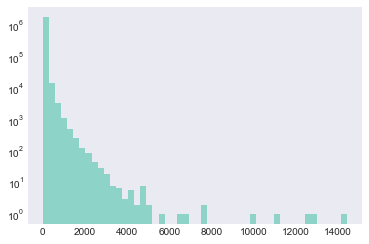

In [33]:
plt.hist(user_df['review_count'], bins=50, log=True)

In [46]:
toronto_rest['postal_code'].value_counts()[:20]

M5T 1L1    35
M1V 5N1    32
M5T        30
M5V 1J5    27
M5V        26
M6A 2T9    23
M4K 1P1    22
M1V        21
M4J 1L2    21
M5B 2H1    21
M4G 3B7    21
M6G 1B4    20
           20
M6K 1L4    19
M4K 1N2    19
M4Y 2A6    19
M6J        19
M5V 1Z4    19
M5V 1K4    18
M5V 1M5    18
Name: postal_code, dtype: int64

(array([1.527e+03, 6.120e+02, 3.270e+02, 0.000e+00, 2.000e+02, 1.300e+02,
        0.000e+00, 1.120e+02, 6.100e+01, 0.000e+00, 5.000e+01, 3.000e+01,
        0.000e+00, 3.600e+01, 2.100e+01, 0.000e+00, 1.500e+01, 1.000e+01,
        0.000e+00, 6.000e+00, 5.000e+00, 0.000e+00, 6.000e+00, 4.000e+00,
        0.000e+00, 5.000e+00, 5.000e+00, 2.000e+00, 0.000e+00, 4.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 1.  ,  1.68,  2.36,  3.04,  3.72,  4.4 ,  5.08,  5.76,  6.44,
         7.12,  7.8 ,  8.48,  9.16,  9.84, 10.52, 11.2 , 11.88, 12.56,
        13.24, 13.92, 14.6 , 15.28, 15.96, 16.64, 17.32, 18.  , 18.68,
        19.36, 20.04, 20.72, 21.4 , 22.08, 22.76, 23.44, 24.12, 24.8 ,
        25.48, 26.16, 26.84, 27.52, 28.2 , 28.88, 29.56, 30.24, 30.92,
        31.6 , 32.28,

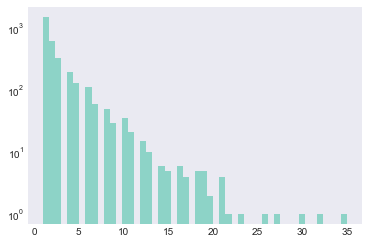

In [42]:
plt.hist(toronto_rest['postal_code'].value_counts(), bins=50, log=True)

In [48]:
toronto_rest['postal_code'].value_counts()[:20].index.to_list()

['M5T 1L1',
 'M1V 5N1',
 'M5T',
 'M5V 1J5',
 'M5V',
 'M6A 2T9',
 'M4K 1P1',
 'M1V',
 'M4J 1L2',
 'M5B 2H1',
 'M4G 3B7',
 'M6G 1B4',
 '',
 'M6K 1L4',
 'M4K 1N2',
 'M4Y 2A6',
 'M6J',
 'M5V 1Z4',
 'M5V 1K4',
 'M5V 1M5']

In [61]:
cs = toronto_rest.groupby('postal_code').size().sort_values(ascending=False).cumsum()

In [62]:
cs[cs < 200]

postal_code
M5T 1L1     35
M1V 5N1     67
M5T         97
M5V 1J5    124
M5V        150
M6A 2T9    173
M4K 1P1    195
dtype: int64

In [64]:
cs.loc['M4K 1P1']

AttributeError: 'numpy.int64' object has no attribute 'index'